# Events detection

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

from events_detection import *

In [2]:
# Data examples 
data = pd.read_csv("../data/data_hists.csv", delimiter=";")

# Selecting one time series
name = 'Problemes/Client mécontent/insatisfait'
df = data[data[data.columns[0]] == name]
df = df.drop(df.columns[0],1)

def prtdt(l):
    return(str(l[2])+str(l[1])+str(l[0]))

df['Date'] = df['Date'].apply(lambda x: prtdt(x.split("/", 3)))

# Sorting according to date
df.sort_values("Date", axis=0, ascending=True, inplace=True)

ts = list(df['Somme'][0:100])

In [3]:
lag = 15
thresh = 1.5
influence = 0.5

signal, avg, std = peaks_detection(ts, lag=lag, thresh=thresh, influence=influence)

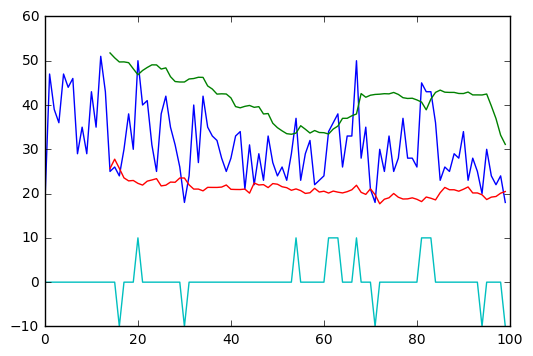

In [4]:
plt.plot(ts)
plt.plot(avg+std*thresh)
plt.plot(avg-std*thresh)
plt.plot(signal*10)

In [5]:
events = events_list(signal)
events

[(16, 17),
 (20, 21),
 (30, 31),
 (54, 55),
 (61, 64),
 (67, 68),
 (71, 72),
 (81, 84),
 (94, 95),
 (99, 100)]